In [13]:
from file_processing import build_dictionary, get_files_count, print_portion
# from probabilities import ...

bag_of_words_spam = build_dictionary("train/spam")
bag_of_words_ham = build_dictionary("train/ham")
total_files = get_files_count("train/spam") + get_files_count("train/ham")
total_vocab = dict(set(bag_of_words_spam.items()) | set(bag_of_words_ham.items()))
total_words = (len(total_vocab))
combined_bag={}
for word in total_vocab:
    combined_bag[word] = {"spam_count" : bag_of_words_spam.get(word, 0), "ham_count" : bag_of_words_ham.get(word, 0)}

sorted_combined_bag = sorted(combined_bag.items(), key=lambda item: item[1]["spam_count"], reverse=True)
print(sorted_combined_bag)
# P(word | spam) = times appeared in spam / total words

# or: p(word | spam)*p(spam) / p(word)

# print_portion(bag_of_words, count, 0.9, 1)


./data_sets/train/spam : 500
10487 words in collection.
./data_sets/train/ham : 2501
26912 words in collection.
[('id', {'spam_count': 500, 'ham_count': 2366}), ('messageid', {'spam_count': 500, 'ham_count': 2500}), ('received', {'spam_count': 500, 'ham_count': 2380}), ('subject', {'spam_count': 500, 'ham_count': 2500}), ('date', {'spam_count': 500, 'ham_count': 2500}), ('returnpath', {'spam_count': 494, 'ham_count': 2500}), ('esmtp', {'spam_count': 493, 'ham_count': 2366}), ('localhost', {'spam_count': 475, 'ham_count': 2362}), ('deliveredto', {'spam_count': 474, 'ham_count': 2365}), ('contenttype', {'spam_count': 466, 'ham_count': 2131}), ('mimeversion', {'spam_count': 427, 'ham_count': 1499}), ('dogmaslashnullorg', {'spam_count': 356, 'ham_count': 2358}), ('smtp', {'spam_count': 356, 'ham_count': 792}), ('imap', {'spam_count': 351, 'ham_count': 2365}), ('contenttransferencoding', {'spam_count': 344, 'ham_count': 966}), ('sep', {'spam_count': 321, 'ham_count': 1310}), ('email', {'spa

epoch: 0 loss:  92.32078294903626
epoch: 400 loss:  33.79131790081576
epoch: 800 loss:  27.9918542960729
epoch: 1200 loss:  24.33481690722147
epoch: 1600 loss:  22.028754937538633


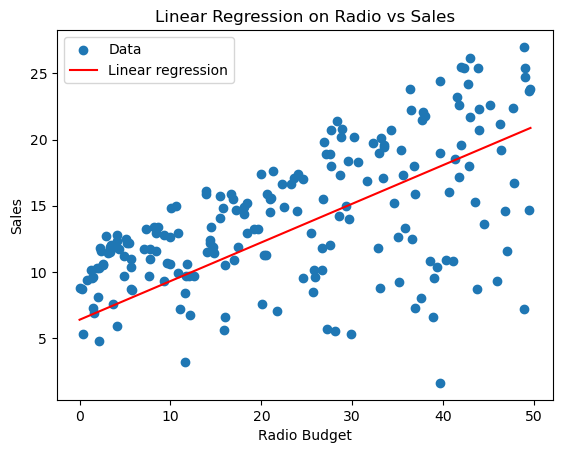



epoch: 0 loss:  92.32078294903626
epoch: 400 loss:  33.79131790081576
epoch: 800 loss:  27.9918542960729
epoch: 1200 loss:  24.33481690722147
epoch: 1600 loss:  22.028754937538633
epoch: 2000 loss:  20.57459375662496
epoch: 2400 loss:  19.657625883308423
epoch: 2800 loss:  19.07940244306619
epoch: 3200 loss:  18.71478514667572
epoch: 3600 loss:  18.48486404079425
epoch: 4000 loss:  18.33987992881413
epoch: 4400 loss:  18.248455556762373
epoch: 4800 loss:  18.19080499291156
epoch: 5200 loss:  18.154451584758743
epoch: 5600 loss:  18.131527779750563
epoch: 6000 loss:  18.117072440822145
epoch: 6400 loss:  18.1079571642151
epoch: 6800 loss:  18.102209234814435
epoch: 7200 loss:  18.098584693967343
epoch: 7600 loss:  18.096299123732113
epoch: 8000 loss:  18.094857884270205
epoch: 8400 loss:  18.093949064600373
epoch: 8800 loss:  18.09337597927063
epoch: 9200 loss:  18.093014601974247
epoch: 9600 loss:  18.092786723954067
epoch: 10000 loss:  18.09264302817517
epoch: 10400 loss:  18.092552

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading csv
df = pd.read_csv('Advertising.csv')

# ???
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)

    for i in range(N):
        dl_dw += -2*spendings[i]*(sales[i] - (w*spendings[i] + b))
        dl_db += -2*(sales[i] - (w*spendings[i] + b))

    w = w - (1/float(N))*dl_dw*alpha
    b = b - (1/float(N))*dl_db*alpha

    return w, b

# ???
def train(spendings, sales, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)

        if e % 400 == 0:
            print("epoch:", e, "loss: ", avg_loss(spendings, sales, w, b))

    return w, b

# ???
def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / float(N)
                                    
                        
# parameters
w_init = 0.0
b_init = 0.0
alpha = 0.001
epochs = 2000

# features
spendings = df['radio'].values
sales = df['sales'].values

# Train the model
w, b = train(spendings, sales, w_init, b_init, alpha, epochs)

# plot data and linear regression
plt.scatter(spendings, sales, label='Data')
x_line = np.linspace(min(spendings), max(spendings), 100)
y_line = w * x_line + b
plt.plot(x_line, y_line, color='red', label='Linear regression')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.legend()
plt.title('Linear Regression on Radio vs Sales')
plt.show()

print("\n")
## Test Prediction
def predict(x,w,b):
    prediction = w*x + b
    print(f'Input of {x} has a predicted output of {prediction}')
    return prediction


w, b = train(spendings, sales, 0.0, 0.0, 0.001, 15000)
x = 23.0
y = predict(x,w,b)